Question 3

Fix a marker on a wall or a flat vertical surface. From a distance D, keeping the camera stationed static (not handheld and mounted on a tripod or placed on a flat surface),
capture an image such that the marker is registered. 
Then translate the camera by T units along the axis parallel to the ground (horizontal) and then capture another image, with the marker being registered. 
Compute D using disparity based depth estimation in stereo-vision theory. 
(Note: you can pick any value for D and T. Keep in mind that T cannot be large as the marker may get out of view. Of course this depends on D) 


In [1]:
import numpy as np
import cv2
import depthai as dai
import matplotlib.pyplot as plt

(-0.5, 959.5, 1279.5, -0.5)

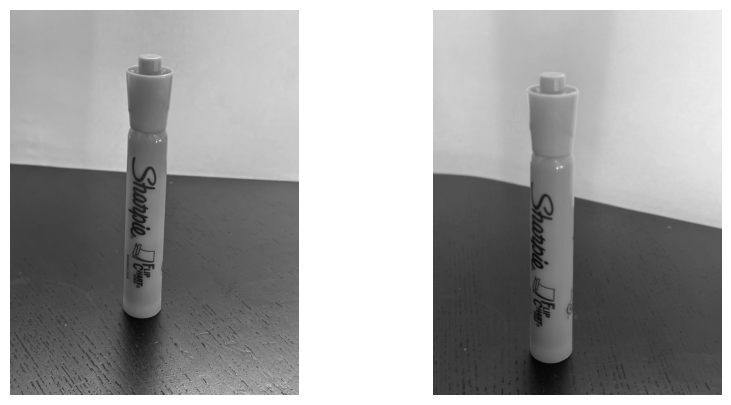

In [2]:
img1 = cv2.imread('image-1.jpg', 0)
img2 = cv2.imread('image-2.jpg', 0)

plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.imshow(img1, 'gray')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(img2, 'gray')
plt.axis('off')

In [3]:
def calcDisparity(bsize = 5) :
    # initialising the stereo block matching obj
    stereo = cv2.StereoBM_create(numDisparities=32, blockSize=bsize)
    
    # disparity image
    disparity = stereo.compute(img1, img2)
    
    # normalze the image for representation
    min = disparity.min()
    max = disparity.max()
    disparity = np.uint8(255 * (disparity - min)/(max - min))
    
    # plot result
    return disparity
    

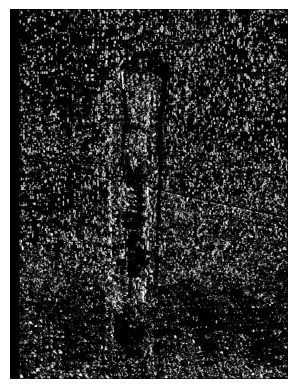

In [4]:
result = calcDisparity()
plt.imshow(result, 'gray')
plt.axis('off')
plt.show()

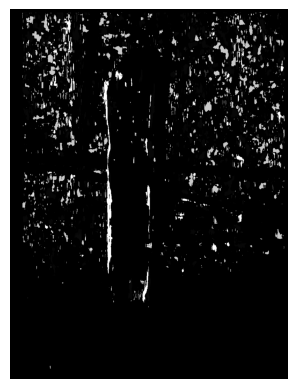

In [5]:
result = calcDisparity(bsize=25)
plt.imshow(result, 'gray')
plt.axis('off')
plt.show()

In [6]:
# Baseline (D in question) in mm
B = 65.3

# Focal length of camera (from assignment 1)
f = 13

depth_map = [[9999999 for ele in row] for row in result]

for i in range(len(result)):
    for j in range(len(result[0])):
        # depth = baseline * focal length / disparity
        if int(result[i][j]) != 0:
            depth_map[i][j] = B * f / result[i][j]

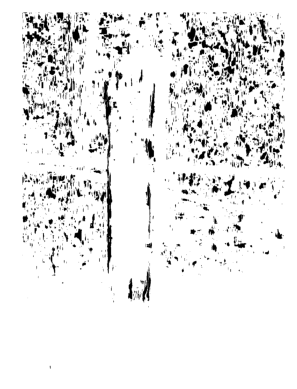

In [7]:
plt.imshow(depth_map, 'gray')
plt.axis('off')
plt.show()